Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


Read the CSV File and Print dataset information

In [ ]:
df = pd.read_csv(r'/content/Loan_Default_new.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Data Preprocessing

In [ ]:
# Drop irrelevant columns
df.drop(columns=['ID'], inplace=True)

# Impute missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Numerical columns imputation
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical columns imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
print(df['Status'].unique())


[ 1.74862748 -0.57187709]


In [ ]:
df['Status'] = df['Status'].astype(int)


In [ ]:
df['Status'] = df['Status'].apply(lambda x: 1 if x > 0.5 else 0)  # Example threshold


In [ ]:
X = df.drop(columns=['Status'])  # Features
y = df['Status']                 # Target variable

# Confirm `y` is binary
print(y.value_counts())


Status
0    112031
1     36639
Name: count, dtype: int64


Train Test Split

In [ ]:
X = df.drop(columns=['Status'])  # Features
y = df['Status']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.784724557745342

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     22406
           1       0.70      0.22      0.33      7328

    accuracy                           0.78     29734
   macro avg       0.75      0.59      0.60     29734
weighted avg       0.77      0.78      0.74     29734


Confusion Matrix:
 [[21723   683]
 [ 5718  1610]]


RANDOM FOREST

In [ ]:
X = df.drop(columns=['Status'])  # Features
y = df['Status']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734


Confusion Matrix:
 [[22406     0]
 [    0  7328]]


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit tree depth
    max_features='sqrt',  # Use a subset of features for splits
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,    # Minimum samples in a leaf
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [1.         1.         0.99993274 0.99996637 1.        ]
Mean CV Accuracy: 0.999979821080245


FEATURE IMPORTANCE PLOT

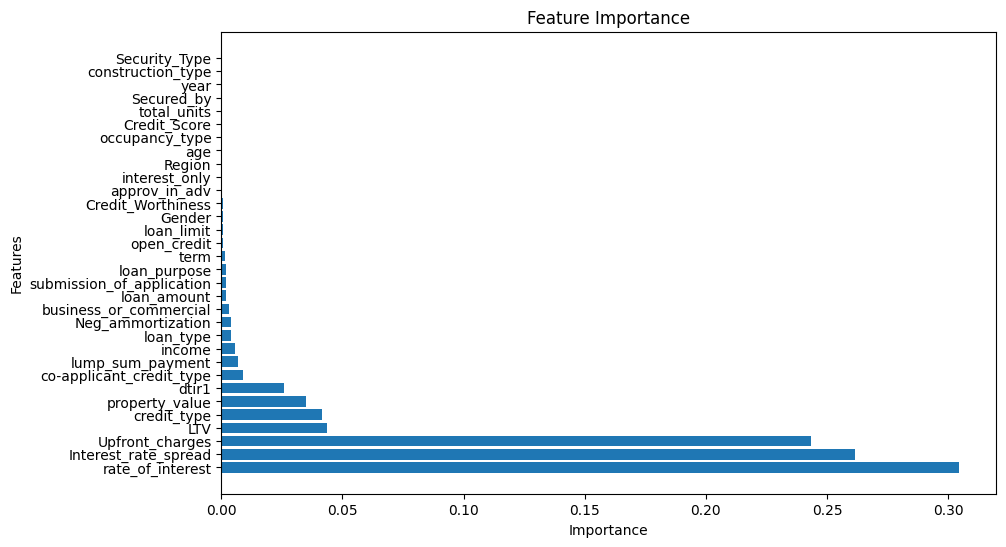

In [ ]:
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


SMOTE - HANDLING IMBALANCE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and target
X = df.drop(columns=['Status'])
y = df['Status']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Initialize and train the SVM model
svm_model = SVC(
    kernel='rbf',  # Radial basis function kernel
    C=1.0,         # Regularization parameter
    gamma='scale', # Kernel coefficient
    random_state=42
)
svm_model.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9686638191968789
Test Accuracy: 0.9630725768480527

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     22494
           1       0.91      0.94      0.93      7240

    accuracy                           0.96     29734
   macro avg       0.95      0.95      0.95     29734
weighted avg       0.96      0.96      0.96     29734


Confusion Matrix:
 [[21841   653]
 [  445  6795]]


In [ ]:
KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and target
X = df.drop(columns=['Status'])
y = df['Status']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
knn_model.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Step 6: Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9398247797134593
Test Accuracy: 0.9078495997847582

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     22494
           1       0.80      0.83      0.81      7240

    accuracy                           0.91     29734
   macro avg       0.87      0.88      0.88     29734
weighted avg       0.91      0.91      0.91     29734


Confusion Matrix:
 [[20973  1521]
 [ 1219  6021]]


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and target
X = df.drop(columns=['Status'])
y = df['Status']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (important for Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Step 6: Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.7727937714401022
Test Accuracy: 0.7757785699872201

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     22494
           1       1.00      0.08      0.15      7240

    accuracy                           0.78     29734
   macro avg       0.89      0.54      0.51     29734
weighted avg       0.83      0.78      0.69     29734


Confusion Matrix:
 [[22494     0]
 [ 6667   573]]


LIGHTGBM - FINAL

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and target
X = df.drop(columns=['Status'])
y = df['Status']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (important for LightGBM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(
    num_leaves=31,       # Number of leaves in full tree
    learning_rate=0.05,  # Step size at each iteration
    n_estimators=100,    # Number of boosting iterations
    random_state=42
)

lgb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

# Step 6: Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 29399, number of negative: 89537
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1966
[LightGBM] [Info] Number of data points in the train set: 118936, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247183 -> initscore=-1.113691
[LightGBM] [Info] Start training from score -1.113691


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training Accuracy: 0.9999915921167687
Test Accuracy: 0.9999327369341494

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734


Confusion Matrix:
 [[22494     0]
 [    2  7238]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
